In [1]:
#Import The Necessary Library
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Load The Dataset That is on .CSV FIle 
data=pd.read_csv('/content/drive/MyDrive/project/Dataset/train_news.csv')
#Head() Is Used the Show the first 5 Rows Of the Dataset 
data.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [3]:
#Drop Un-Necessary Column That Has No Use in Solving The Prediction Problem 
data=data.drop('Unnamed: 0',axis=1)

In [4]:
#Used Head TO Show The First 5 Rows Of The Dataset After Droping The  Unnamed Column 
data.head()

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [5]:
#Check The Shape Of The Dataset 
print ('Shape = >',data.shape)

Shape = > (20800, 5)


# Dataset - Cleaning 

In [6]:
#Count the Numbers Of Fake And Not Fake  News Result On the Dataset It Also Uses To Check The Dataset Is Balanced OR InBalanced Dataset 
#'1' For Fake News And '0' For Not Fake
print ('Fake-1 and Not Fake-0  counts','\n',data.label.value_counts())

Fake-1 and Not Fake-0  counts 
 1    10413
0    10387
Name: label, dtype: int64


In [7]:
#To Check The NuLL Values If Dataset Have 
data.isnull().sum() 

id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [8]:
#Fill Empty Wrriten_by column With the Write Name Unknown For Prevention For The Loss Of Data
data["written_by"].fillna("Unknown", inplace = True) 

In [9]:
#Again Check The Dataset Have Empty column ,nan or Zero Value in it 
data.isnull().sum()

id              0
headline      558
written_by      0
news           39
label           0
dtype: int64

In [10]:
#Here Drop Those Rows Who Have Missing Headline or News Column Value 
data=data.dropna()

In [11]:
data=data.dropna(subset=['news'])#Drop it And Theset News as Subset it 

In [12]:
data.shape #Check The Shape 

(20203, 5)

In [13]:
#Calculate the Ratio For Fake=1
print ('Negitive ratio = ', round(len(data[data['label']==1]) / len(data.label),2)*100,'%')
#Calculate the Ratio For Not  Fake
print ('Positive ratio  = ', round(len(data[data['label']==0]) / len(data.label),2)*100,'%')

Negitive ratio =  49.0 %
Positive ratio  =  51.0 %


In [14]:
#ADD the Length_of_News Coulmn of News Articel length That Show Each Article Length OF News 
data['length_of_News'] = data.news.str.len()
#ADD the Length_of_Headline Coulmn of Headline Articel length That Show Each Article Length OF Headline 
data['length_of_headline'] = data.headline.str.len()
data.head(2)

,id,headline,written_by,news,label,length_of_News,length_of_headline
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,7936,84
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,6112,72


# Dataset Pre-Processing 

For Headline Column 

In [15]:
#Remove the Accent For the Headline Column 
from unicodedata import normalize
remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")
data['headline'] = data['headline'].apply(remove_accent)

In [16]:
#Convert itno the Lower case
data['headline'] = data['headline'].str.lower()

In [17]:
#Remove the Punctution 
data['headline']= data['headline'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
data['headline'] = data['headline'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
data['headline'] = data['headline'].str.replace(r'£|\$', 'dollers')
data['headline'] = data['headline'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
data['headline'] = data['headline'].str.replace(r'\d+(\.\d+)?', 'numbr')
data['headline'] = data['headline'].str.replace(r'[^\w\d\s]', ' ')
data['headline'] = data['headline'].str.replace(r'\s+', ' ')
data['headline'] = data['headline'].str.replace(r'^\s+|\s+?$', '')

*For* News Column 

In [18]:
#Remove the Accent For the News Column 
from unicodedata import normalize
remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")
data['news'] = data['news'].apply(remove_accent)

In [19]:
#Convert itno the Lower case
data['news'] = data['news'].str.lower()

In [20]:
#Remove the Punctution 
data['news']= data['news'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
data['news'] = data['news'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
data['news'] = data['news'].str.replace(r'£|\$', 'dollers')
data['news'] = data['news'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
data['news'] = data['news'].str.replace(r'\d+(\.\d+)?', 'numbr')
data['news'] = data['news'].str.replace(r'[^\w\d\s]', ' ')
data['news'] = data['news'].str.replace(r'\s+', ' ')
data['news'] = data['news'].str.replace(r'^\s+|\s+?$', '')

# Stopward Removel 

For News Column

In [21]:
#Import The Library From NLTK
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
#For Message
import string
from nltk.corpus import  stopwords
#Remove the Stopwords And We Also Those Stopwards That We Want To ADD On The Stopward List 
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure',''])
data['news']= data['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

 For Headline Column

In [23]:
#For Message
import string
from nltk.corpus import  stopwords
#Remove the Stopwords And We Also Those Stopwards That We Want To ADD On The Stopward List 
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure',''])
data['headline']= data['headline'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [24]:
#ADD the clean_Length_of_News Coulmn of News Articel length That Show Each Article Length OF News  After Pre-Processing The Each Article 
data['clean_length_news'] = data.news.str.len()
data.head()

,id,headline,written_by,news,label,length_of_News,length_of_headline,clean_length_news
0,9653,ethics questions dogged agriculture nominee ge...,Eric Lipton and Steve Eder,washington sonny perdues telling georgians gro...,0,7936,84,5545
1,10041,must dig deep stop argentinas lionel messi new...,David Waldstein,houston venezuela plan tactical approach desig...,0,6112,72,4201
2,19113,cotton house walk plank vote bill cannot pass ...,Pam Key,sunday abcs week discussing republican plan re...,0,425,100,270
3,6868,paul lepage besieged maine governor sends conf...,Jess Bidgood,augusta beleaguered republican governor maine ...,0,6516,100,4454
4,7596,digital numbr numbr trump wins,Finian Cunningham,finian cunningham written extensively internat...,1,9164,28,6738


In [25]:
#ADD the clean_Length_of_Headine Coulmn of Headline  Articel length That Show Each Article Length OF Headline   After Pre-Processing The Each Article
data['clean_length_headline'] = data.headline.str.len()
data.head()

,id,headline,written_by,news,label,length_of_News,length_of_headline,clean_length_news,clean_length_headline
0,9653,ethics questions dogged agriculture nominee ge...,Eric Lipton and Steve Eder,washington sonny perdues telling georgians gro...,0,7936,84,5545,75
1,10041,must dig deep stop argentinas lionel messi new...,David Waldstein,houston venezuela plan tactical approach desig...,0,6112,72,4201,57
2,19113,cotton house walk plank vote bill cannot pass ...,Pam Key,sunday abcs week discussing republican plan re...,0,425,100,270,62
3,6868,paul lepage besieged maine governor sends conf...,Jess Bidgood,augusta beleaguered republican governor maine ...,0,6516,100,4454,87
4,7596,digital numbr numbr trump wins,Finian Cunningham,finian cunningham written extensively internat...,1,9164,28,6738,30


In [26]:
#Check Th Length of News Each Article Of News Column Before 
print ('Original_Length', data.length_of_News.sum())
#Check Th Length of News Each Article Of News Column After 
print ('Clean_Length', data.clean_length_news.sum())

Original_Length 94308498
Clean_Length 65345749


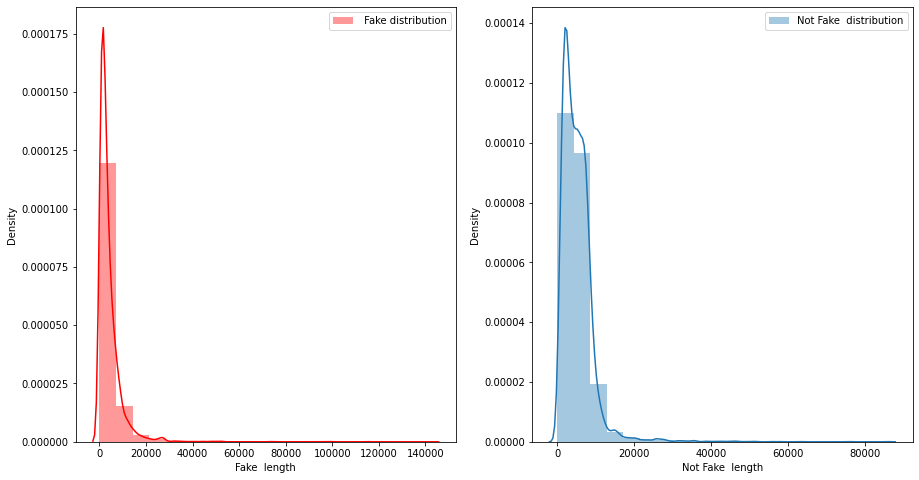

In [27]:
#Show Them it With Help matplotlib Graph Before The  length Of News Column Being Pre-Process 
f,ax = plt.subplots(1,2,figsize = (15,8))
sns.distplot(data[data['label']==1]['length_of_News'],bins=20,ax=ax[0],label=' Fake distribution',color='r')
ax[0].set_xlabel('Fake  length')
ax[0].legend()
sns.distplot(data[data['label']==0]['length_of_News'],bins=20,ax=ax[1],label='Not Fake  distribution')
ax[1].set_xlabel('Not Fake  length')
ax[1].legend()
plt.show()

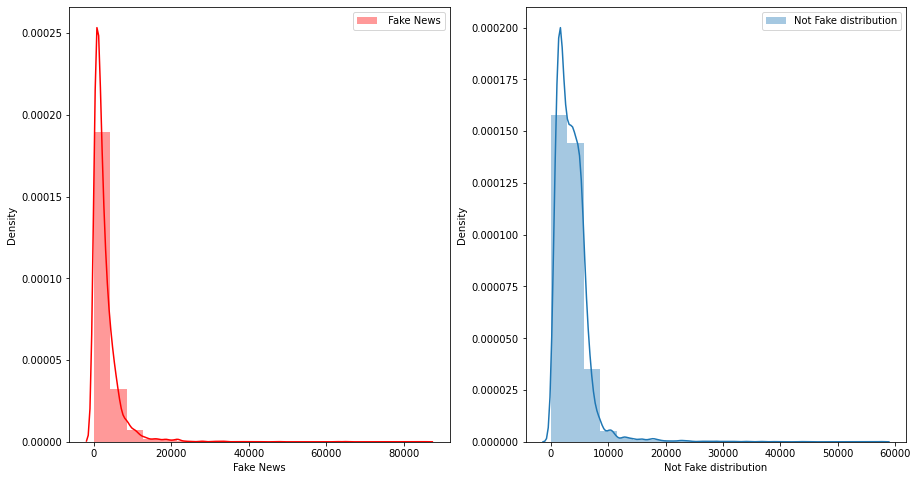

In [28]:
#Show Them it With Help matplotlib Graph after The  length Of News Column Being Pre-Process 
f,ax = plt.subplots(1,2,figsize = (15,8))
sns.distplot(data[data['label']==1]['clean_length_news'],bins=20,ax=ax[0],label=' Fake News',color='r')
ax[0].set_xlabel('Fake News')
ax[0].legend()
sns.distplot(data[data['label']==0]['clean_length_news'],bins=20,ax=ax[1],label='Not Fake distribution')
ax[1].set_xlabel('Not Fake distribution')
ax[1].legend()
plt.show()

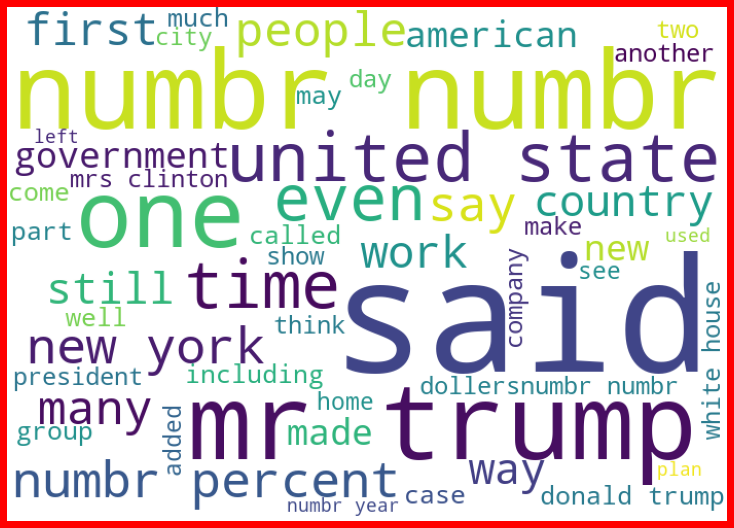

In [29]:
# Word Cloud  displays a list of words, the importance of each being shown with font size or color Of the news column of Not Fake 
from wordcloud import WordCloud
spams = data['news'][data['label']==0]
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

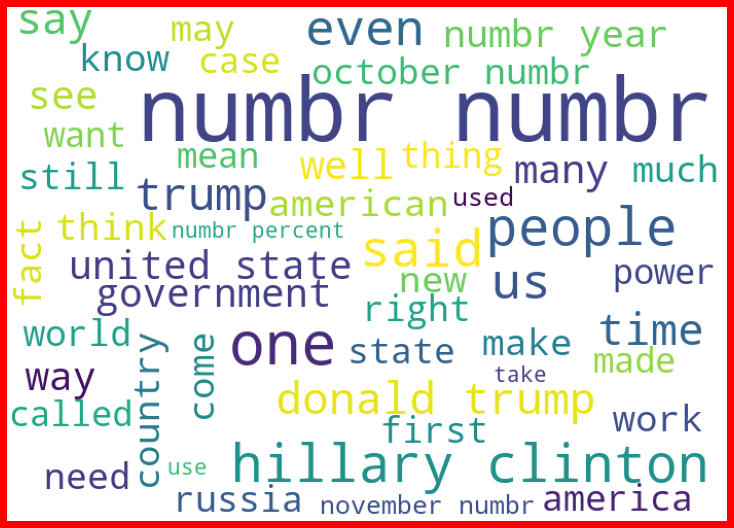

In [30]:
# Word Cloud  displays a list of words, the importance of each being shown with font size or color Of the news column of Fake 
from wordcloud import WordCloud
spams = data['news'][data['label']==1]
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [31]:
#Assigng the news column into Variable 't'
t= data["news"].iloc[0:20203]
print(t)

0        washington sonny perdues telling georgians gro...
1        houston venezuela plan tactical approach desig...
2        sunday abcs week discussing republican plan re...
3        augusta beleaguered republican governor maine ...
4        finian cunningham written extensively internat...
                               ...                        
20794    policing america today rib dinner paid strange...
20796    rixon stewart november numbr numbr rixon stewa...
20797    posted eddie know dakota access pipeline prote...
20798    officially summer society boutique society mem...
20799    emory university atlanta georgia announced fun...
Name: news, Length: 20203, dtype: object


In [32]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')
#Tokenize and Lemmatize
from nltk import stem
stemmer = stem.SnowballStemmer('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [33]:
import gensim
# Converts into tokens (Alternative to word_tokenize)
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
#from nltk.stem import *
import numpy as np
np.random.seed(400)

In [34]:
# writing function for the entire dataset
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))

    result=" ".join(result)        
    return result
        

In [35]:
 #tfidf vectorizer to assign a vectorize value 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.feature_extraction.text import CountVectorizer
#Train test split to split the dataset into xtrain xtest ytrain ytest 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#ngram_range=(1,2)
tf_vec = TfidfVectorizer(ngram_range=(1,2))
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(t.apply(preprocess))
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_transformed = tf_transformer.transform(X_train_counts)



#feature=tf_vec.fit_transform(X_train_counts)
x=X_train_transformed
y=data['label']

In [36]:
X_train,x_test,Y_train,y_test = train_test_split(x,y,random_state=42)

In [37]:
#Import the model algo 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
#Assing the parameter 
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [39]:
clfs = {'SVC' : svc,'KN'  : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [40]:
#Here We Fit The Model With Loop
def train(clf, features, targets):    
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [41]:
pred_scores_word_vectors = []
pred_scores_word = []
pred_scores = []
for k,v in clfs.items():
    train(v, X_train, Y_train)
    pred = predict(v, x_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))
    pred_scores_word.append((k, [confusion_matrix(y_test , pred)]))
    pred_scores.append((k, [classification_report(y_test , pred)]))

In [42]:
#To  Check The Accuracy Score For Different algo
for i in range(len(pred_scores_word_vectors)):
  print(pred_scores_word_vectors[i])

('SVC', [0.9378340922589586])
('KN', [0.4862403484458523])
('NB', [0.882399524846565])
('DT', [0.8481488814096219])
('LR', [0.9182340130667195])
('RF', [0.8766580875074242])


In [43]:
#Fill into to Dataframe 
predictions=pd.DataFrame(pred_scores_word_vectors,columns=['Index',"score"])
predictions

,Index,score
0,SVC,[0.9378340922589586]
1,KN,[0.4862403484458523]
2,NB,[0.882399524846565]
3,DT,[0.8481488814096219]
4,LR,[0.9182340130667195]
5,RF,[0.8766580875074242]


In [44]:
# Here To Check the Confusion Matrix  For Different algo
for i in range(len(pred_scores_word)):
  print(pred_scores_word[i],'\n')

('SVC', [array([[2466,  136],
       [ 178, 2271]])]) 

('KN', [array([[   7, 2595],
       [   0, 2449]])]) 

('NB', [array([[2512,   90],
       [ 504, 1945]])]) 

('DT', [array([[2225,  377],
       [ 390, 2059]])]) 

('LR', [array([[2418,  184],
       [ 229, 2220]])]) 

('RF', [array([[2394,  208],
       [ 415, 2034]])]) 



In [45]:
# Here To Check the Classification Report  For Different algo And Also Check the F1-Score 
for i in range(len(pred_scores)):
  print(pred_scores[i])

('SVC', ['              precision    recall  f1-score   support\n\n           0       0.93      0.95      0.94      2602\n           1       0.94      0.93      0.94      2449\n\n    accuracy                           0.94      5051\n   macro avg       0.94      0.94      0.94      5051\nweighted avg       0.94      0.94      0.94      5051\n'])
('KN', ['              precision    recall  f1-score   support\n\n           0       1.00      0.00      0.01      2602\n           1       0.49      1.00      0.65      2449\n\n    accuracy                           0.49      5051\n   macro avg       0.74      0.50      0.33      5051\nweighted avg       0.75      0.49      0.32      5051\n'])
('NB', ['              precision    recall  f1-score   support\n\n           0       0.83      0.97      0.89      2602\n           1       0.96      0.79      0.87      2449\n\n    accuracy                           0.88      5051\n   macro avg       0.89      0.88      0.88      5051\nweighted avg     

In [46]:
#cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [47]:
def skl(ker):
  i=ker
  score=cross_val_score(i,x,y,cv=5,scoring='accuracy')
  print('score of mean \n',score.mean())
  print('score of standard devition \n',score.std())
  y_pred=cross_val_predict(mnb,x,y,cv=5)
  print('prediction \n',y_pred)

In [48]:
#Multinomail 
skl(mnb)

score of mean 
 0.884027431696399
score of standard devition 
 0.00425725368119943
prediction 
 [0 0 0 ... 1 0 0]


In [49]:
#KNC
skl(knc)

score of mean 
 0.4871553703254513
score of standard devition 
 0.00047875405879432717
prediction 
 [0 0 0 ... 1 0 0]


In [50]:
#Decision tree CLassifier
skl(dtc)

score of mean 
 0.8479430760447982
score of standard devition 
 0.003186122340270248
prediction 
 [0 0 0 ... 1 0 0]


In [51]:
#random Forest Classifier
skl(rfc) 

score of mean 
 0.8787311002815205
score of standard devition 
 0.0038238193990767556
prediction 
 [0 0 0 ... 1 0 0]


In [52]:
#Logistic Regression 
skl(lrc)

score of mean 
 0.9240211838555794
score of standard devition 
 0.003323887684418342
prediction 
 [0 0 0 ... 1 0 0]


In [53]:
#ROC_AUC curve for determine the Perfromance of Model 
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score

In [54]:
def roc(ker):
  i=ker
  y_pred_probe=i.predict_proba(x_test)[:,0]
  y_pred_probe
  tpr,fpr,thersholds=roc_curve(y_test,y_pred_probe)
  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr,label='Multinomial')
  plt.xlabel('false Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multinomial')
  plt.show()

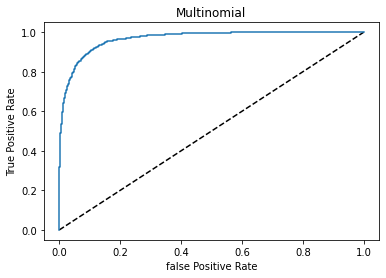

In [55]:
roc(mnb)

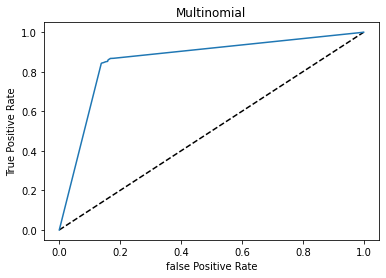

In [56]:
roc(dtc)

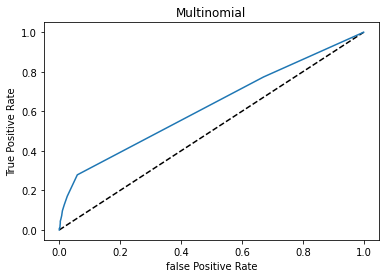

In [57]:
roc(knc)

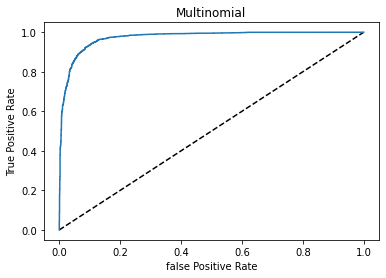

In [58]:
roc(lrc)

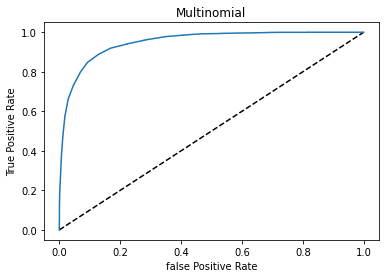

In [66]:
roc(rfc)

In [67]:
from sklearn.externals import joblib#SAve The Best Model 
joblib.dump(dtc, 'best.pkl')
print ("Best Model (Naive Bayes) Saved")


Best Model (Naive Bayes) Saved


In [68]:
best = joblib.load('best.pkl')

In [69]:
best#DTC Model 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=111, splitter='best')

In [70]:
def find(p):
    if p == 1:
        print ("News Is Fake")
    else:
        print ("News Is Not Fake")

In [71]:
#Check the prediction On Random Texts 
text1 = ["No. I meant the calculation is the same. That I'll call later"]
text2 = ["Had your contract mobile 11 Mnths? Latest Motorola Now"]
text = ["Free tones Hope you enjoyed your new content"]
integers1 = tf_vec.fit_transform(text1)
integers2 = tf_vec.fit_transform(text2)
integers3 = tf_vec.fit_transform(text)

In [ ]:
#Check our model is Predict a good result
p1 = best.predict(integers1)[0] 
p2 = best.predict(integers2)[0]
p3 = best.predict(integers3)[0]
find(p1)
find(p2)
find(p3)

